In [1]:
import pandas as pd
import matplotlib as mpl
import seaborn as sb
import re
from os.path import join, dirname
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join

%matplotlib inline

In [2]:
def convert_index_to_timedelta(index, sampling_rate=400):
    """converts the index to time delta"""
    index = [i*1.0/sampling_rate for i in index]
    return pd.to_timedelta(index,'s')
    

def load_data(path,convert_index=True):
    """converts the data to a pandas object
    Parameters: 
        path(str): absolute path to the m file 
        convert_index(bool): if True, convert the index to a time delta
    Returns: 
        (data,sampling_rate,sequence):(pd.DataFrame, int, int) 
    """
    # load the matlab file and extract the data
    data = loadmat(path)['dataStruct']
    
    # get the sampling rate and cast to int
    sampling_rate = int(data['iEEGsamplingRate'][0][0])
    
    #extract the iEEG traces and electrode channel data and place into a data frame
    traces = data['data'][0][0]
    channels = data['channelIndices'][0][0][0]
    df = pd.DataFrame(traces, columns = channels)
    
    if convert_index: 
        df.index = convert_index_to_timedelta(df.index, sampling_rate)
    
    #get the sequence collection number if present (not present in test)
    sequence = -1
    if 'sequence' in data.dtype.names:
        sequence =int(data['sequence'])

    return df, sampling_rate, sequence

## Prototype data loading

Using Chris' function, I will load some data. 

In [3]:
# Setting up the path
base = "D:/Users/Anthony/Documents/Kaggle-Competitions/Kaggle-EKK-Data"
train1_path = join(base, 'train_1')
train2_path = join(base, 'train_2')
train3_path = join(base, 'train_3')

In [161]:
train_1_0_data, sampling_rate, sequence = load_data(join(train1_path, '1_1_0'))
train_1_1_data, sampling_rate_1, sequence_1 = load_data(join(train1_path, '1_1_1'))

In [162]:
train_1_0_data.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
00:00:00,3.275756,24.066677,-54.997391,-3.789555,-19.482683,-21.098763,6.14821,-14.256918,-17.065411,72.938507,-18.983807,-26.179564,39.678238,22.507507,-8.210621,16.264605
00:00:00.002500,1.275756,20.066677,-64.997391,-2.789555,-22.482683,-21.098763,7.14821,-17.256918,-14.065411,80.938507,-21.983807,-20.179564,44.678238,24.507507,-2.210621,13.264606
00:00:00.005000,4.275756,16.066677,-63.997391,3.210445,-26.482683,-20.098763,5.14821,-17.256918,-15.065411,78.938507,-26.983807,-22.179564,46.678238,25.507507,-2.210621,15.264606
00:00:00.007500,5.275756,13.066677,-58.997391,7.210445,-28.482683,-19.098763,8.14821,-19.256918,-14.065411,70.938507,-26.983807,-17.179564,44.678238,18.507507,1.789379,15.264606
00:00:00.010000,-3.724244,12.066677,-51.997391,6.210445,-23.482683,-16.098763,11.14821,-15.256918,-15.065411,67.938507,-28.983807,-17.179564,37.678238,14.507507,1.789379,16.264605


In [163]:
train_1_1_data.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
00:00:00,19.372654,-1.637786,-41.805889,-30.165956,-29.614086,-39.087807,-42.990002,-51.494865,33.444702,52.844738,-5.536399,-14.102811,60.846317,62.861694,46.629383,-18.145241
00:00:00.002500,23.372654,-4.637786,-36.805889,-30.165956,-43.614086,-39.087807,-37.990002,-52.494865,29.444700,48.844738,-1.536400,-15.102811,62.846317,70.861694,48.629383,-17.145241
00:00:00.005000,25.372654,-10.637786,-34.805889,-33.165955,-48.614086,-44.087807,-35.990002,-53.494865,26.444700,40.844738,1.463600,-15.102811,61.846317,84.861694,52.629383,-17.145241
00:00:00.007500,30.372654,-20.637787,-33.805889,-32.165955,-53.614086,-42.087807,-34.990002,-53.494865,24.444700,32.844738,-1.536400,-15.102811,63.846317,91.861694,64.629379,-17.145241
00:00:00.010000,31.372654,-23.637787,-42.805889,-35.165955,-47.614086,-36.087807,-35.990002,-56.494865,12.444701,30.844740,-5.536399,-13.102811,63.846317,94.861694,73.629379,-17.145241


In [7]:
train_1_0_data[1.0].head()

00:00:00           3.275756
00:00:00.002500    1.275756
00:00:00.005000    4.275756
00:00:00.007500    5.275756
00:00:00.010000   -3.724244
Name: 1.0, dtype: float32

Let's see if there is any noticable difference in distribution of the raw data of any of the electrodes.

(-100, 100)

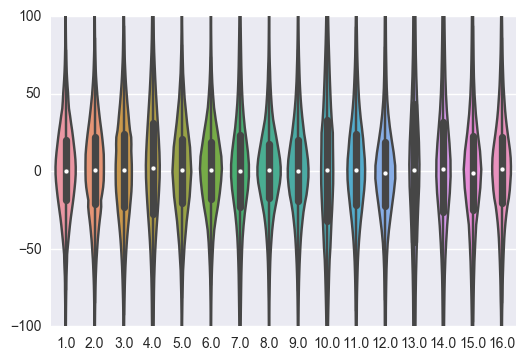

In [8]:
p = sb.violinplot(data=train_1_0_data)
p.set_ylim(-100,100)

There are some slight differences but nothing stark.
Now let's compare interictal vs pre-ictal.

To do so, I will reshape the table so that I get the following columns:

time | preictal (boolean flag)| electrode | value

In [9]:
train_1_0_data['preictal'] = 0
train_1_1_data['preictal'] = 1

In [10]:
train_1_0_data.reset_index(inplace=True)
train_1_1_data.reset_index(inplace=True)

In [11]:
train_1_0_data.set_index(['index','preictal'], inplace=True)
train_1_1_data.set_index(['index','preictal'], inplace=True)
train_1_1_data.head()
combined = pd.concat([train_1_0_data, train_1_1_data])

In [12]:
combined.head()

,,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
index,preictal,,,,,,,,,,,,,,,,
00:00:00,0,3.275756,24.066677,-54.997391,-3.789555,-19.482683,-21.098763,6.14821,-14.256918,-17.065411,72.938507,-18.983807,-26.179564,39.678238,22.507507,-8.210621,16.264605
00:00:00.002500,0,1.275756,20.066677,-64.997391,-2.789555,-22.482683,-21.098763,7.14821,-17.256918,-14.065411,80.938507,-21.983807,-20.179564,44.678238,24.507507,-2.210621,13.264606
00:00:00.005000,0,4.275756,16.066677,-63.997391,3.210445,-26.482683,-20.098763,5.14821,-17.256918,-15.065411,78.938507,-26.983807,-22.179564,46.678238,25.507507,-2.210621,15.264606
00:00:00.007500,0,5.275756,13.066677,-58.997391,7.210445,-28.482683,-19.098763,8.14821,-19.256918,-14.065411,70.938507,-26.983807,-17.179564,44.678238,18.507507,1.789379,15.264606
00:00:00.010000,0,-3.724244,12.066677,-51.997391,6.210445,-23.482683,-16.098763,11.14821,-15.256918,-15.065411,67.938507,-28.983807,-17.179564,37.678238,14.507507,1.789379,16.264605


In [13]:
c_stack = combined.stack()
c_stack = pd.DataFrame(c_stack)
c_stack.reset_index(inplace=True)
c_stack.columns = ['time', 'preictal', 'electrode', 'value']
c_stack_0_4 = c_stack.query('electrode <= 4')
c_stack_5_8 = c_stack.query('electrode >4 and electrode<=8')
c_stack_9_12 = c_stack.query('electrode >8 and electrode<=12')
c_stack_13_16 = c_stack.query('electrode >12 and electrode<=16')

(-100, 100)

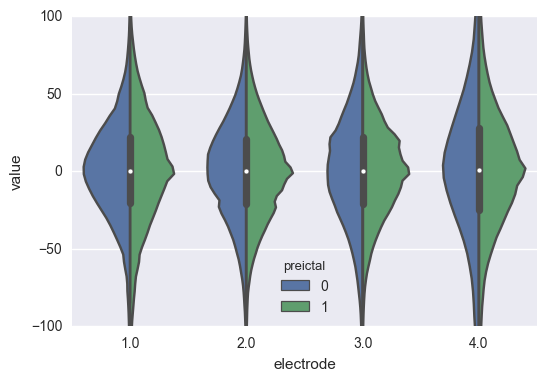

In [14]:
p2 = sb.violinplot(x='electrode', y='value', hue='preictal', data=c_stack_0_4, split=True)
p2.set_ylim(-100,100)

(-100, 100)

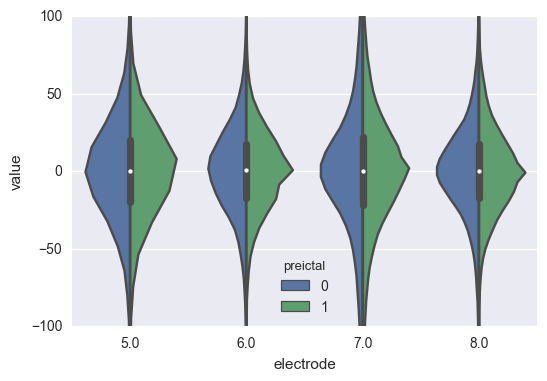

In [15]:
p3 = sb.violinplot(x='electrode', y='value', hue='preictal', data=c_stack_5_8, split=True)
p3.set_ylim(-100,100)

(-100, 100)

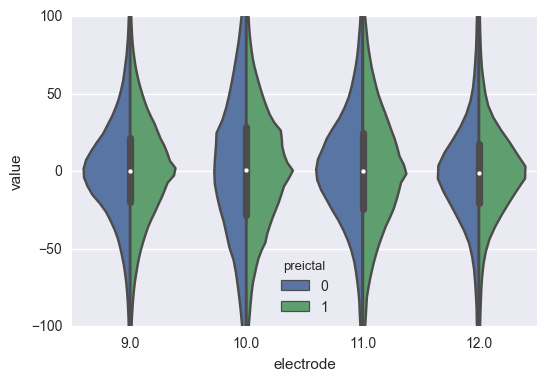

In [16]:
p4 = sb.violinplot(x='electrode', y='value', hue='preictal', data=c_stack_9_12, split=True)
p4.set_ylim(-100,100)

(-100, 100)

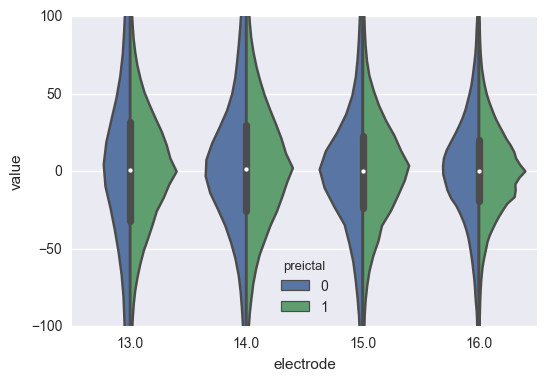

In [17]:
p5 = sb.violinplot(x='electrode', y='value', hue='preictal', data=c_stack_13_16, split=True)
p5.set_ylim(-100,100)

These violin plot shows for at least the first data set that the distribution of data points is less normal for pre-ictal data! It would be interesting to qualitatively see if this trend holds true for all the data sets!

Let me start simple by just looking at means/medians, and get a distribution of medians and stds for all train data sets.

In [158]:
import dask.multiprocessing

def all_dists(train_path):
    seizure_df = pd.DataFrame()
    failures = []
    for patient_path in train_path:
        values = [delayed(process_file)(f) for f in listdir(patient_path) if isfile(join(patient_path, f))]
        results = compute(*values, get=dask.multiprocessing.get)
    return results

def process_file(f):
    print('processing', f)
    this_file_df = pd.DataFrame()
    try:
        df, sampling_rate, sequence = load_data(f)
        df.columns = [i for i in range(0,16)]
        # Determine if this is an inter or preictal dataset and put in corresponding bucket.
        split_string = data_file.replace('.', '_').split('_')
        for electrode in range(0,16):
            this_file_dict[str(electrode)+'_mean'] = [df[electrode].mean()]
            this_file_dict[str(electrode)+'_std'] = [df[electrode].std()]
            this_file_dict[str(electrode)+'_med'] = [df[electrode].median()]
            this_file_dict[str(electrode)+'_mad'] = [df[electrode].mad()]
        this_file_df = pd.DataFrame(this_file_dict)
        this_file_df['dataset_id'] = split_string[1]
        this_file_df['pre_ictal'] = split_string[2]
        this_file_df['patient'] = split_string[0]
    except Exception as e:
        pass
    return this_file_df

In [159]:
result = all_dists([train1_path])

In [160]:
process_file(join(train1_path, '1_1_0'))

processing D:/Users/Anthony/Documents/Kaggle-Competitions/Kaggle-EKK-Data\train_1\1_1_0


""


In [155]:
def all_dists(train_path):
    seizure_df = pd.DataFrame()
    failures = []
    for patient_path in train_path:
        data_files = [f for f in listdir(patient_path) if isfile(join(patient_path, f))]
        for data_file in data_files[:2]:
            print('processing', data_file)
            this_file_df = pd.DataFrame()
            try:
                df, sampling_rate, sequence = load_data(join(patient_path, data_file))
                df.columns = [i for i in range(0,16)]
                # Determine if this is an inter or preictal dataset and put in corresponding bucket.
                split_string = data_file.replace('.', '_').split('_')
                for electrode in range(0,16):
                    this_file_dict[str(electrode)+'_mean'] = [df[electrode].mean()]
                    this_file_dict[str(electrode)+'_std'] = [df[electrode].std()]
                    this_file_dict[str(electrode)+'_med'] = [df[electrode].median()]
                    this_file_dict[str(electrode)+'_mad'] = [df[electrode].mad()]
                this_file_df = pd.DataFrame(this_file_dict)
                this_file_df['dataset_id'] = split_string[1]
                this_file_df['pre_ictal'] = split_string[2]
                this_file_df['patient'] = split_string[0]
                if seizure_df.empty:
                    seizure_df = this_file_df.copy()
                else:
                    seizure_df = pd.concat([seizure_df, this_file_df])
            except Exception as e:
                failures.append(data_file)
                print(e)
    return seizure_df

In [156]:
all_dists([train1_path])

processing 1_1000_0.mat
processing 1_1001_0.mat


,0_mad,0_mean,0_med,0_std,10_mad,10_mean,10_med,10_std,11_mad,11_mean,...,8_mean,8_med,8_std,9_mad,9_mean,9_med,9_std,dataset_id,pre_ictal,patient
0,28.356153,0.000013,-0.322961,38.211166,38.228776,-0.245933,1.709265,57.203423,54.727775,0.287039,...,-0.123931,1.597128,50.692684,36.774419,-0.229047,1.828655,51.417274,1000,0,1
0,26.507214,-0.000095,-0.219816,35.702911,36.858756,-0.222666,2.214263,55.580425,54.243172,0.261379,...,-0.102871,0.507822,47.790928,36.232630,-0.189988,1.467610,50.325691,1001,0,1


In [ ]:
this_file_df['0_mean']